# 2. Evaluating Mayinga assemblies

> evaluating polishing strategies for de novo vs. reference guided assemblies, as well as for fast vs. high accuracy basecalling

***

## Overview

* calculate consensus identity

* check structural and nucleotide differences

***

**TODO**

1. colour snps in MSA viewer
2. filter coverage for nucfdiff - e.g. only check differences in areas where coverage > 50x
3. add in some qcat parameters (e.g. read length, Q score)

***

## Consensus identity

Grab the mayinga reference genome:

In [1]:
!find ./ -name GCF_000848505.1_ViralProj14703_genomic.fna.gz -exec gunzip -c {} + > tmp/mayinga-ref-genome.fasta

Collect all the mayinga assemblies from the pipeline outputs (for both fast and hac):

In [23]:
# get a file list of all the polished assemblies we just made
!find $PWD/pipelines/data/ebov-dn-assemblies/r941_min*/*barcode-09.assembly.racon.*.fasta > tmp/mayinga-genomes.list

Calculate the consensus identity for each Mayinga sample compared to the reference:

* this can be calculated from columns 10 and 11 of a PAF alignment file
* [hengi li's take on sequence identity](https://lh3.github.io/2018/11/25/on-the-definition-of-sequence-identity)

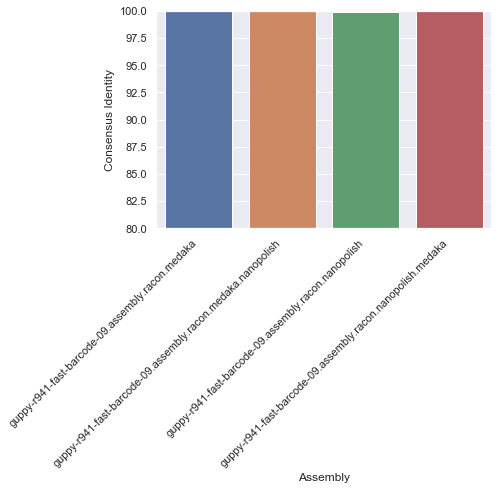

In [24]:
# import the minimap2 binding (mappy)
import os
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
import mappy as mp

# set up the results list
idents = []

# set up the index
a = mp.Aligner("tmp/mayinga-ref-genome.fasta", preset="asm10")  # load or build index
if not a: raise Exception("ERROR: failed to load/build index")

# open the list of assemblies we made
with open("tmp/mayinga-genomes.list", "r") as fh:
    
    # align each assembly to the reference
    for line in fh:
        base=os.path.basename(line)
        assemblyName=os.path.splitext(base)[0]
        for name, seq, qual in mp.fastx_read(line.rstrip()):
            
            # get the best hit for each assembly
            topHit = 0.0
            for hit in a.map(seq):
                if (hit.mlen/hit.blen) > topHit:
                    topHit = (hit.mlen/hit.blen) * 100.0
            
            # store for plotting later
            idents.append([assemblyName, topHit])
            
# plot the consensus identities
df = pd.DataFrame(idents, columns = ['Assembly', 'Consensus Identity']) 
chart = sns.barplot(x="Assembly", y="Consensus Identity", data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light')
chart.set(ylim=(80, 100))
chart

## Structural and nucleotide differences

Use NucDiff to get some stats on SNPs, InDels and rearrangements:

In [25]:
# fast
!nucdiff tmp/mayinga-ref-genome.fasta pipelines/data/ebov-dn-assemblies/r941_min_fast/*barcode-09.assembly.raw.fasta tmp/nucdiff-out unpolished-f
!nucdiff tmp/mayinga-ref-genome.fasta pipelines/data/ebov-dn-assemblies/r941_min_fast/*barcode-09.assembly.racon.medaka.fasta tmp/nucdiff-out medaka-f
!nucdiff tmp/mayinga-ref-genome.fasta pipelines/data/ebov-dn-assemblies/r941_min_fast/*barcode-09.assembly.racon.medaka.nanopolish.fasta tmp/nucdiff-out medaka-nanopolish-f
!nucdiff tmp/mayinga-ref-genome.fasta pipelines/data/ebov-dn-assemblies/r941_min_fast/*barcode-09.assembly.racon.nanopolish.fasta tmp/nucdiff-out nanopolish-f
!nucdiff tmp/mayinga-ref-genome.fasta pipelines/data/ebov-dn-assemblies/r941_min_fast/*barcode-09.assembly.racon.nanopolish.medaka.fasta tmp/nucdiff-out nanopolish-medaka-f

# hac
!nucdiff tmp/mayinga-ref-genome.fasta pipelines/data/ebov-dn-assemblies/r941_min_hac/*barcode-09.assembly.raw.fasta tmp/nucdiff-out unpolished-h
!nucdiff tmp/mayinga-ref-genome.fasta pipelines/data/ebov-dn-assemblies/r941_min_hac/*barcode-09.assembly.racon.medaka.fasta tmp/nucdiff-out medaka-h
!nucdiff tmp/mayinga-ref-genome.fasta pipelines/data/ebov-dn-assemblies/r941_min_hac/*barcode-09.assembly.racon.medaka.nanopolish.fasta tmp/nucdiff-out medaka-nanopolish-h
!nucdiff tmp/mayinga-ref-genome.fasta pipelines/data/ebov-dn-assemblies/r941_min_hac/*barcode-09.assembly.racon.nanopolish.fasta tmp/nucdiff-out nanopolish-h
!nucdiff tmp/mayinga-ref-genome.fasta pipelines/data/ebov-dn-assemblies/r941_min_hac/*barcode-09.assembly.racon.nanopolish.medaka.fasta tmp/nucdiff-out nanopolish-medaka-h


Run NUCmer...

1: PREPARING DATA
2,3: RUNNING mummer AND CREATING CLUSTERS
# reading input file "/Users/willrowe/Desktop/signal-check/tmp/nucdiff-out/unpolished-f.ntref" of length 18960
# construct suffix tree for sequence of length 18960
# (maximum reference length is 536870908)
# (maximum query length is 4294967295)
# CONSTRUCTIONTIME //anaconda3/envs/notebook-analysis/opt/mummer-3.23/mummer /Users/willrowe/Desktop/signal-check/tmp/nucdiff-out/unpolished-f.ntref 0.00
# reading input file "/Users/willrowe/Desktop/signal-check/pipelines/data/ebov-dn-assemblies/r941_min_fast/guppy-r941-fast-barcode-09.assembly.raw.fasta" of length 18634
# matching query-file "/Users/willrowe/Desktop/signal-check/pipelines/data/ebov-dn-assemblies/r941_min_fast/guppy-r941-fast-barcode-09.assembly.raw.fasta"
# against subject-file "/Users/willrowe/Desktop/signal-check/tmp/nucdiff-out/unpolished-f.ntref"
# COMPLETETIME //anaconda3/envs/notebook-analysis/opt/mummer-3.23/mummer /Users/willrowe/Desktop/signal


Run NUCmer...

1: PREPARING DATA
2,3: RUNNING mummer AND CREATING CLUSTERS
# reading input file "/Users/willrowe/Desktop/signal-check/tmp/nucdiff-out/nanopolish-f.ntref" of length 18960
# construct suffix tree for sequence of length 18960
# (maximum reference length is 536870908)
# (maximum query length is 4294967295)
# CONSTRUCTIONTIME //anaconda3/envs/notebook-analysis/opt/mummer-3.23/mummer /Users/willrowe/Desktop/signal-check/tmp/nucdiff-out/nanopolish-f.ntref 0.00
# reading input file "/Users/willrowe/Desktop/signal-check/pipelines/data/ebov-dn-assemblies/r941_min_fast/guppy-r941-fast-barcode-09.assembly.racon.nanopolish.fasta" of length 18904
# matching query-file "/Users/willrowe/Desktop/signal-check/pipelines/data/ebov-dn-assemblies/r941_min_fast/guppy-r941-fast-barcode-09.assembly.racon.nanopolish.fasta"
# against subject-file "/Users/willrowe/Desktop/signal-check/tmp/nucdiff-out/nanopolish-f.ntref"
# COMPLETETIME //anaconda3/envs/notebook-analysis/opt/mummer-3.23/mummer /Use

In [31]:
# nucdiff will report SNPs, InDels and rearrangements, as well as the breadth of coverage, compared to the reference
import glob
from tabulate import tabulate

def parseNucDiff(ndFiles):
    dfs = []
    for f in ndFiles:
        fn = os.path.basename(f).replace('_stat.out', '')
        df = pd.read_csv(f, sep='\t', header=None, index_col=0)
        df.columns = [fn]
        dfs.append(df)
    combined = pd.concat(dfs, axis=1, sort=False)
    #stats = combined.loc[ ['Total number', 'Insertions', 'Deletions', 'Substitutions', 'Uncovered ref regions num', 'Uncovered ref regions len'] , : ]
    return combined.loc[ ['Total number', 'Insertions', 'Deletions', 'Substitutions'] , : ]

fastBasecalls = [i for i in glob.glob('tmp/nucdiff-out/results/*-f_stat.out')]
hacBasecalls = [i for i in glob.glob('tmp/nucdiff-out/results/*-h_stat.out')]

fastTable = parseNucDiff(fastBasecalls)
print("fast basecalling:")
print(tabulate(fastTable, headers='keys', tablefmt='psql'))
print()

#hacTable = parseNucDiff(hacBasecalls)
#print("high accuracy basecalling:")
#print(tabulate(hacTable, headers='keys', tablefmt='psql'))

fast basecalling:
+---------------+-----------------------+------------+----------------+----------------+-----------------------+
| 0             |   nanopolish-medaka-f |   medaka-f |   unpolished-f |   nanopolish-f |   medaka-nanopolish-f |
|---------------+-----------------------+------------+----------------+----------------+-----------------------|
| Total number  |                     5 |          6 |           1311 |             14 |                     4 |
| Insertions    |                     1 |          1 |            339 |              2 |                     1 |
| Deletions     |                     3 |          4 |            466 |             10 |                     1 |
| Substitutions |                     1 |          1 |            506 |              2 |                     2 |
+---------------+-----------------------+------------+----------------+----------------+-----------------------+



Now let's create a multiple sequence alignment to visualise the differences:
* use sed to label each fasta header in the assemblies with the basecalling model

In [45]:
!cp tmp/mayinga-ref-genome.fasta tmp/mayinga-assemblies.fasta
!sed s/contig/fast-/ pipelines/data/ebov-dn-assemblies/r941_min_*/*barcode-09.assembly.racon* >> tmp/mayinga-assemblies.fasta


In [46]:
# generate a multiple sequence alignment using Muscle
from Bio.Align.Applications import MuscleCommandline
muscle_cmd = MuscleCommandline(input = "tmp/mayinga-assemblies.fasta", out = "tmp/mayinga-assembly-alignment.msa", clw=True)
muscle_cmd()

# print using BioPython
from Bio import AlignIO
align = AlignIO.read("tmp/mayinga-assembly-alignment.msa", "clustal")
print(align.format("clustal"))

CLUSTAL X (3.8) multiple sequence alignment


NC_002549.1                         CGGACACACAAAAAGAAAGAAGAATTTTTAGGATCTTTTGTGTGCGAATA
medaka.fast-1                       --------------------------------------------------
nanopolish.medaka.fast-1            --------------------------------------------------
nanopolish.fast-1                   --------------------------------------------------
medaka.nanopolish.fast-1            --------------------------------------------------
                                                                                      

NC_002549.1                         ACTATGAGGAAGATTAATAATTTTCCTCTCATTGAAATTTATATCGGAAT
medaka.fast-1                       ------------------------CCTCTCATTGAAATTTATATCGGAAT
nanopolish.medaka.fast-1            ------------------------CCTCTCATTGAAATTTATATCGGAAT
nanopolish.fast-1                   ------------------------CCTCTCATTGAAATTTATATCGGAAT
medaka.nanopolish.fast-1            ------------------------CCTCTCATTGAAATTTATATCGG